In [1]:
import sys
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.models.detection.anchor_utils import AnchorGenerator
from torchvision.models.detection.image_list import ImageList
from torchvision.models.detection import rpn
from torchvision import transforms as T
from torchvision import datasets
from Modules import image_maker, shapes, colors

## Generating images

In [2]:
"""
Let's make an example 512 x 512 image
"""
canvas_size = (512, 512)
color_picker = colors.ColorPicker(
    colors.KNOWN_COLORS,
    colors.default_hls_settings
)

img_generator = image_maker.ImageMaker(image_shape=canvas_size,
                                       color_picker=color_picker,
                                       number_of_colors=4,
                                       shapes = [
                                           shapes.Triangle(),
                                           shapes.Circle(
                                               specifications={
                                                   'min_size': 80,
                                                   'max_size': 220
                                               }),
                                           shapes.Square(
                                               specifications={
                                                   'min_size': 35,
                                                   'max_size': 250
                                               })
                                       ],
                                      )

def make_image():
    image_meta = img_generator()
    image = image_maker.construct_image(image_meta)
    return image, image_meta

In [3]:
example_image, example_image_meta = make_image()

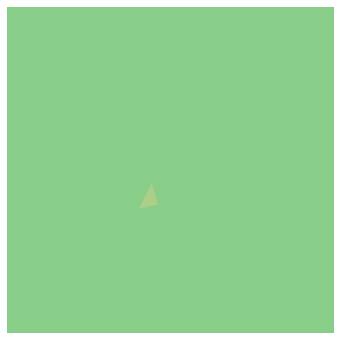

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
ax.axis('off')
ax.imshow(example_image)

## Instantiating a pretrained model to create a feature map

In [5]:
model_repo = 'pytorch/vision:v0.10.1'

vgg16 = torch.hub.load(repo_or_dir=model_repo,
                       model='vgg16')
layer_count = 0
for layer in vgg16.children():
    layer_count += 1
print(f"vgg16 has {layer_count} layers")

Using cache found in /Users/carlosolivares/.cache/torch/hub/pytorch_vision_v0.10.1


vgg16 has 3 layers


Clearly the model has more than three layers. What actually happens is that they group the related steps together: 

In [7]:
"""
create the vgg16 based feature map creator
"""


print("COMPLETE VGG16 MODEL")
print(vgg16)
print("FEATURE MAP MAKER")
print(vgg16_featuremapper())

COMPLETE VGG16 MODEL
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, 

NameError: name 'vgg16_featuremapper' is not defined

## making a feature map to pass to the backbone

In [8]:
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

standard_transform = T.Compose(
    [
        T.ToTensor(),
        normalize,
    ]
)

In [9]:
feature_mapper = vgg16_featuremapper()
image_for_input = standard_transform(example_image)
feature_map = feature_mapper(image_for_input)

NameError: name 'vgg16_featuremapper' is not defined

In [10]:
print(f"The feature map has shape {feature_map.shape}")

NameError: name 'feature_map' is not defined

In [11]:
"""
Putting all of this in an ImageList 
"""

image_list = ImageList(tensors=image_for_input, image_sizes=[(512,512)])

NameError: name 'image_for_input' is not defined

In [12]:
anchor_generator = AnchorGenerator()

In [13]:
anchor_generator.sizes

((128, 256, 512),)

In [14]:
what_is_this = anchor_generator(image_list, [feature_map])

NameError: name 'image_list' is not defined

In [15]:
print("Here ye, here ye! This object is the output of pytorch's anchor generator!")
print(f"It is of type: {type(what_is_this)}")
for i, thing in enumerate(what_is_this):
    print(f"the {i} element of this list is of type{type(thing)}")

Here ye, here ye! This object is the output of pytorch's anchor generator!


NameError: name 'what_is_this' is not defined

In [16]:
print(what_is_this[0].shape)

NameError: name 'what_is_this' is not defined

In [17]:
print(what_is_this)

NameError: name 'what_is_this' is not defined

In [18]:
anchor_generator.num_anchors_per_location()[0]

9

In [19]:
#anchor_generator.num_anchors_per_location()

## what does pascal VOC detection data look like?

In [20]:
type(voc_2012_dataset[0])

NameError: name 'voc_2012_dataset' is not defined

In [21]:
len(voc_2012_dataset[0])

NameError: name 'voc_2012_dataset' is not defined

## Can we send data through an RPN?

I thinkkkk I have enough information about the RPN in pytorch to pass data through it

In [3]:
def vgg16_featuremapper():
    model_repo = 'pytorch/vision:v0.10.1'
    model_name = 'vgg16'
    full_pretrained_vgg16 = torch.hub.load(
        repo_or_dir=model_repo,
        model=model_name,
        #pretrained=True
    )
    for child in full_pretrained_vgg16.children():
        break
    model = torch.nn.Sequential(child)
    return model

anchor_generator = AnchorGenerator()
num_feature_map_channels = 512

rpn_pre_nms_top_n = {"training": 2000, "testing": 1000}
rpn_post_nms_top_n = {"training": 2000, "testing": 1000}
rpn_nms_thresh = 0.7
rpn_fg_iou_thresh = 0.7
rpn_bg_iou_thresh = 0.2
rpn_batch_size_per_image = 256
rpn_positive_fraction = 0.5

class BasicRegionProposalNetwork():
    """The simplest iteration of a region proposal network
    as faithful to the original implementation from the paper
    as possible"""

    def __init__(self):
        super().__init__()
        self.vgg16_backbone = vgg16_featuremapper()
        self.anchor_generator = anchor_generator
        self.anchors_per_location = anchor_generator.num_anchors_per_location()[0]
        self.rpn_head = rpn.RPNHead(in_channels=num_feature_map_channels,
                                    num_anchors=self.anchors_per_location)
        self.region_proposal_network = rpn.RegionProposalNetwork(
            anchor_generator=anchor_generator,
            head=self.rpn_head,
            fg_iou_thresh=rpn_fg_iou_thresh,
            bg_iou_thresh=rpn_bg_iou_thresh,
            batch_size_per_image=rpn_batch_size_per_image,
            positive_fraction=rpn_positive_fraction,
            pre_nms_top_n=rpn_pre_nms_top_n,
            post_nms_top_n=rpn_post_nms_top_n,
            nms_thresh=rpn_nms_thresh
            )

In [4]:
voc_2012_dataset = datasets.VOCDetection(root='/Users/carlosolivares/throwaway/pascalVOC',
                                        download=False,
                                        image_set='trainval',
                                        transforms=None,
                                       )

In [5]:
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

standard_transform = T.Compose(
    [
        T.Resize((256,256)),
        T.ToTensor(),
        normalize,
    ]
)

In [6]:
image, metadata = voc_2012_dataset[0]

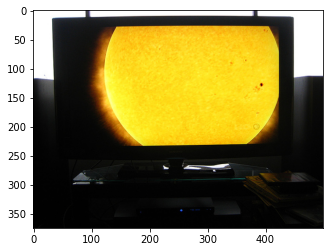

In [7]:
plt.imshow(image)

In [8]:
print(metadata)

{'annotation': {'folder': 'VOC2012', 'filename': '2008_000002.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '375', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'tvmonitor', 'pose': 'Frontal', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '34', 'ymin': '11', 'xmax': '448', 'ymax': '293'}, 'difficult': '0'}]}}


In [9]:
print(metadata['annotation']['object'][0]['bndbox'])

{'xmin': '34', 'ymin': '11', 'xmax': '448', 'ymax': '293'}


In [10]:
bounding_box_info = metadata['annotation']['object'][0]['bndbox']
## pytorch expects the boundong box ground truth labels in the format:
## torch.tensor([x1, y1, x2, y2])
## such that: 

## 0 <= x1 < x2
## 0 <= y1 < y2

bounding_box_gt = torch.tensor(
    [
        int(bounding_box_info['xmin']),
        int(bounding_box_info['ymin']),
        int(bounding_box_info['xmax']),
        int(bounding_box_info['ymax'])
    ]).unsqueeze(dim=0)

rpn_loss_targets = {'boxes': bounding_box_gt}

targets_batch = [rpn_loss_targets]

In [11]:
targets_batch

[{'boxes': tensor([[ 34,  11, 448, 293]])}]

In [12]:
basic_rpn = BasicRegionProposalNetwork()

Using cache found in /Users/carlosolivares/.cache/torch/hub/pytorch_vision_v0.10.1


In [13]:
feature_map = basic_rpn.vgg16_backbone(standard_transform(image))

In [14]:
print(feature_map.shape)

torch.Size([512, 8, 8])


In [15]:
feature_batch_input = [{'0': feature_map}]

In [16]:
images_batch_input = ImageList(tensors=standard_transform(image), image_sizes=[(256,256)])

In [17]:
test = basic_rpn.rpn_head([feature_map])

In [18]:
type(test)

tuple

In [19]:
print(len(test))

2


In [20]:
logits, bbox_reg = test

In [21]:
print(logits[0].shape)

torch.Size([9, 8, 8])


In [22]:
bbox_reg[0].shape

torch.Size([36, 8, 8])

In [24]:
test = basic_rpn.region_proposal_network(images=images_batch_input,
                                         features={'0': feature_map},
                                         targets=targets_batch
)

IndexError: tuple index out of range